In [41]:
# Лабораторная работа 3_2_2
# Многоклассовая логистическая регрессия на датасете Iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [42]:
# Загрузка данных
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Создание DataFrame для визуализации
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Вывод информации о данных
print("Первые 5 строк данных:")
display(df.head())
print("\nКоличество образцов каждого класса:")
print(df['species'].value_counts())

Первые 5 строк данных:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Количество образцов каждого класса:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


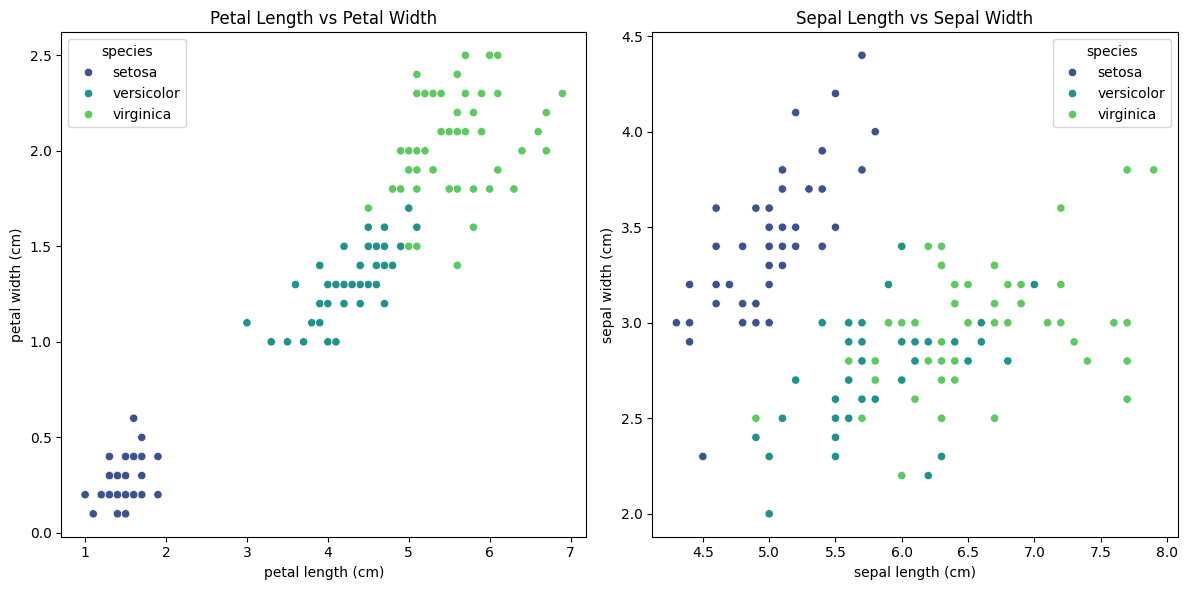

In [43]:
# Визуализация данных
plt.figure(figsize=(12, 6))

# Petal length vs petal width
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')
plt.title('Petal Length vs Petal Width')

# Sepal length vs sepal width
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='viridis')
plt.title('Sepal Length vs Sepal Width')

plt.tight_layout()
plt.show()

In [44]:
# Подготовка данных
X = df[['petal length (cm)', 'petal width (cm)']]  # Используем только эти признаки для визуализации
y = df['target']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [45]:
# Создание и обучение модели
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Точность модели: 1.0000

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


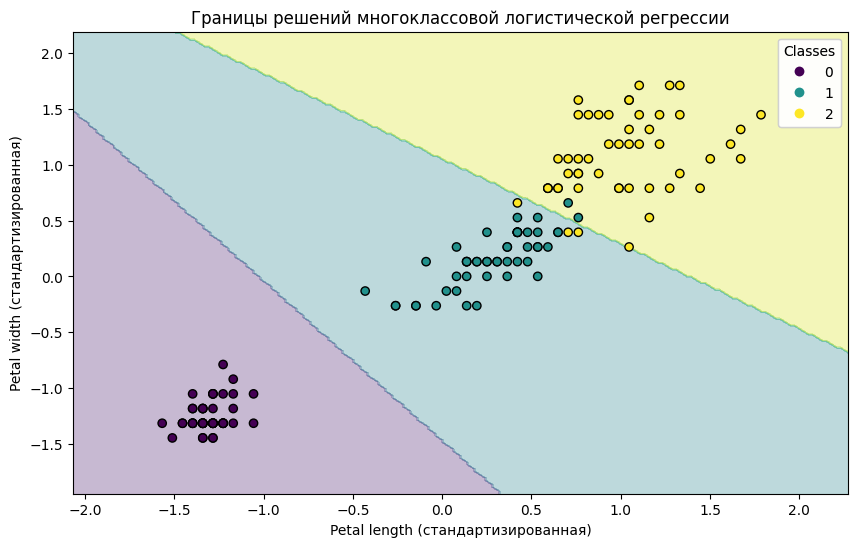

In [46]:
# Визуализация границ решений
def plot_decision_boundary(X, y, model):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.xlabel('Petal length (стандартизированная)')
    plt.ylabel('Petal width (стандартизированная)')
    plt.title('Границы решений многоклассовой логистической регрессии')
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend)
    plt.show()

plot_decision_boundary(X_scaled, y, model)

In [47]:
# Коэффициенты модели
print("Коэффициенты модели:")
for i, (coef, intercept) in enumerate(zip(model.coef_, model.intercept_)):
    print(f"\nКласс {iris.target_names[i]}:")
    print(f"  petal length coef: {coef[0]:.4f}")
    print(f"  petal width coef: {coef[1]:.4f}")
    print(f"  intercept: {intercept:.4f}")

Коэффициенты модели:

Класс setosa:
  petal length coef: -2.3392
  petal width coef: -2.0640
  intercept: -0.7110

Класс versicolor:
  petal length coef: 0.1174
  petal width coef: -0.3485
  intercept: 1.8139

Класс virginica:
  petal length coef: 2.2218
  petal width coef: 2.4124
  intercept: -1.1029
